<a href="https://colab.research.google.com/github/fbaertl/Applied_Data_science_CAS_2022/blob/main/CAS_M3_Un_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Steps : Dataload , model building , analysis of results - Optional data standardisation and augmentation 

In [ ]:
#Import the needed libraries
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn import metrics

from matplotlib import  pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import os
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

Data Load 

In [ ]:
#Get CIFAR10 data from our source: https://keras.io/api/datasets/cifar10/
cifar10 = tf.keras.datasets.cifar10

#tf.keras.datasets.cifar10.load_data() ##Optional to take a look at the data

In [ ]:
#Giving the classes names
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 
                       'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Load the data - 2 times for comparing augmented data vs initial data 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
#quick check of data structure 
print('x_train shape',X_train.shape)
print('x_test shape',X_test.shape)
print('2nd version')
print('train_images shape',train_images.shape)
print('test_images shape',test_images.shape)

x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)
2nd version
train_images shape (50000, 32, 32, 3)
test_images shape (10000, 32, 32, 3)


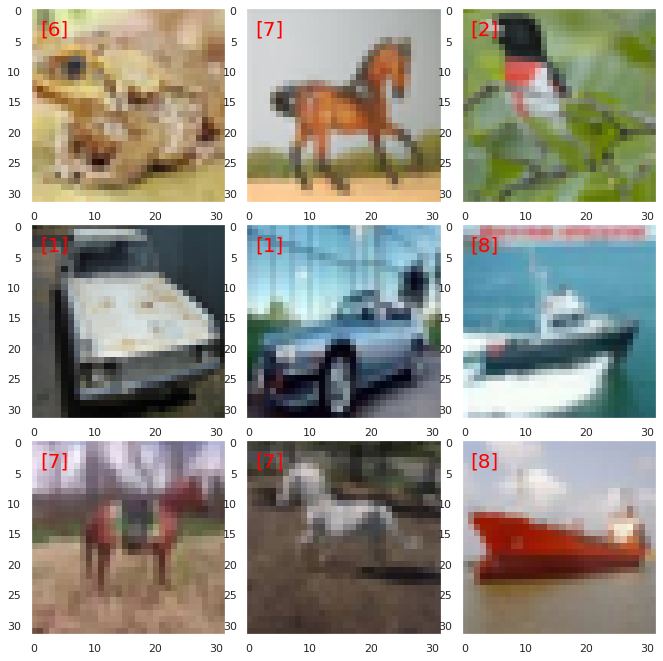

In [ ]:
#Taking a look at a few samples

n = 3
fig, ax = plt.subplots(n, n, figsize=(3*n, 3*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(X_train), n**2)):
  im = X_train[im_idx]
  im_class = y_train[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='red', size=20)
    ##Optional to indicate the class of the image
  axi.grid(False)
plt.tight_layout(0,0,0)

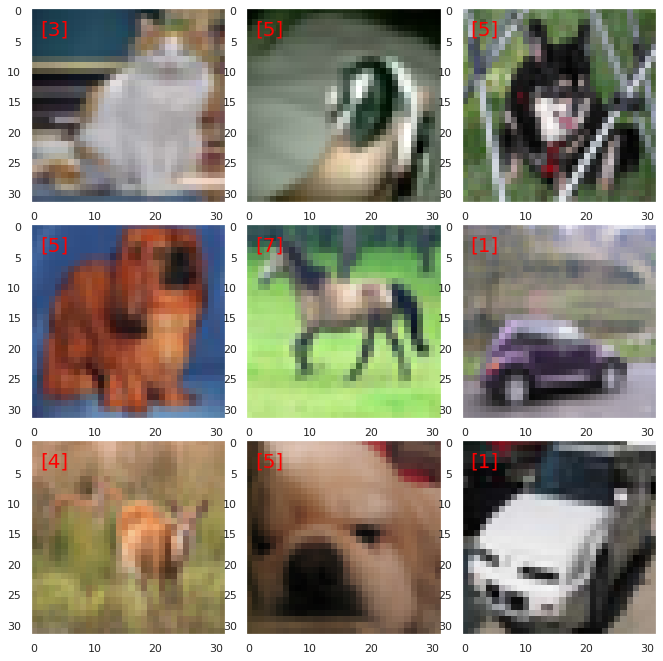

In [ ]:
#Taking a look at a few samples 2nd version 

n = 3
fig, ax = plt.subplots(n, n, figsize=(3*n, 3*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='red', size=20)
    ##Optional to indicate the class of the image
  axi.grid(False)
plt.tight_layout(0,0,0)

In [ ]:
#data normalisation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Model Setup 

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  #tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 200)               614600    
                                                                 
 dense_15 (Dense)            (None, 200)               40200     
                                                                 
 dense_16 (Dense)            (None, 150)               30150     
                                                                 
 dense_17 (Dense)            (None, 100)               15100     
                                                                 
Total params: 700,050
Trainable params: 700,050
Non-trainable params: 0
_________________________________________________________________


Model training

Epoch 1/15
200/200 [==============================] - 2s 6ms/step - loss: 1.9844 - accuracy: 0.2933 - val_loss: 1.8056 - val_accuracy: 0.3588
Epoch 2/15
200/200 [==============================] - 1s 4ms/step - loss: 1.7256 - accuracy: 0.3860 - val_loss: 1.6946 - val_accuracy: 0.3839
Epoch 3/15
200/200 [==============================] - 1s 5ms/step - loss: 1.6385 - accuracy: 0.4198 - val_loss: 1.6783 - val_accuracy: 0.3958
Epoch 4/15
200/200 [==============================] - 1s 4ms/step - loss: 1.5717 - accuracy: 0.4393 - val_loss: 1.5402 - val_accuracy: 0.4503
Epoch 5/15
200/200 [==============================] - 1s 4ms/step - loss: 1.5337 - accuracy: 0.4552 - val_loss: 1.5346 - val_accuracy: 0.4515
Epoch 6/15
200/200 [==============================] - 1s 4ms/step - loss: 1.4871 - accuracy: 0.4696 - val_loss: 1.5284 - val_accuracy: 0.4576
Epoch 7/15
200/200 [==============================] - 1s 4ms/step - loss: 1.4563 - accuracy: 0.4839 - val_loss: 1.4860 - val_accuracy: 0.4705
Epoch 

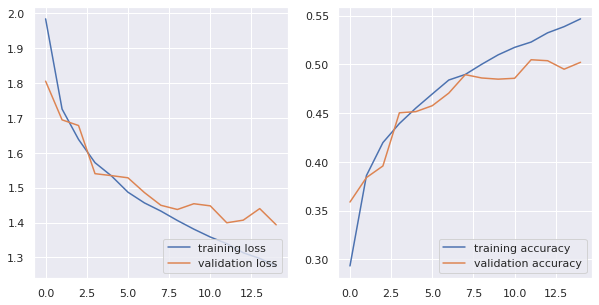

In [ ]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=X_train, y=y_train,
                 epochs=15, batch_size=250, 
                 validation_data=(X_test,y_test),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Epoch 1/15
200/200 [==============================] - 1s 4ms/step - loss: 31.3795 - accuracy: 0.1315 - val_loss: 2.3161 - val_accuracy: 0.1118
Epoch 2/15
200/200 [==============================] - 1s 4ms/step - loss: 2.2912 - accuracy: 0.1299 - val_loss: 2.2578 - val_accuracy: 0.1438
Epoch 3/15
200/200 [==============================] - 1s 3ms/step - loss: 2.2581 - accuracy: 0.1445 - val_loss: 2.2337 - val_accuracy: 0.1568
Epoch 4/15
200/200 [==============================] - 1s 4ms/step - loss: 2.2243 - accuracy: 0.1600 - val_loss: 2.1757 - val_accuracy: 0.1814
Epoch 5/15
200/200 [==============================] - 1s 5ms/step - loss: 2.1213 - accuracy: 0.2056 - val_loss: 2.0801 - val_accuracy: 0.2070
Epoch 6/15
200/200 [==============================] - 1s 4ms/step - loss: 2.0628 - accuracy: 0.2179 - val_loss: 2.0473 - val_accuracy: 0.2251
Epoch 7/15
200/200 [==============================] - 1s 4ms/step - loss: 2.0343 - accuracy: 0.2261 - val_loss: 2.0214 - val_accuracy: 0.2355
Epoch

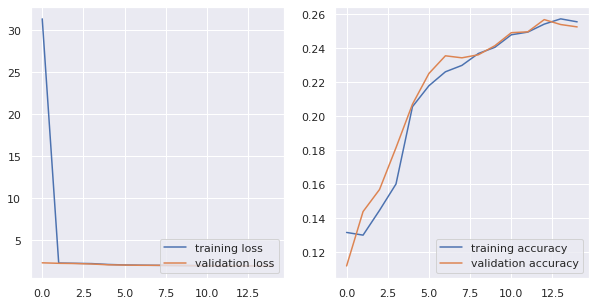

In [ ]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [ ]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.9446 - accuracy: 0.2525 - 648ms/epoch - 2ms/step


[1.9446130990982056, 0.2524999976158142]

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  #tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(500, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 1s 6ms/step - loss: 33.6449 - accuracy: 0.2181 - val_loss: 2.0894 - val_accuracy: 0.3049
Epoch 2/15
200/200 [==============================] - 1s 4ms/step - loss: 2.0350 - accuracy: 0.3143 - val_loss: 1.9222 - val_accuracy: 0.3389
Epoch 3/15
200/200 [==============================] - 1s 4ms/step - loss: 1.8718 - accuracy: 0.3499 - val_loss: 1.8940 - val_accuracy: 0.3352
Epoch 4/15
200/200 [==============================] - 1s 4ms/step - loss: 1.7952 - accuracy: 0.3725 - val_loss: 1.8387 - val_accuracy: 0.3535
Epoch 5/15
200/200 [==============================] - 1s 4ms/step - loss: 1.7378 - accuracy: 0.3881 - val_loss: 1.9275 - val_accuracy: 0.3461
Epoch 6/15
200/200 [==============================] - 1s 4ms/step - loss: 1.7195 - accuracy: 0.3957 - val_loss: 1.7642 - val_accuracy: 0.3841
Epoch 7/15
200/200 [==============================] - 1s 4ms/step - loss: 1.7002 - accuracy: 0.4022 - val_loss: 1.6995 - val_accuracy: 0.4048
Epoch

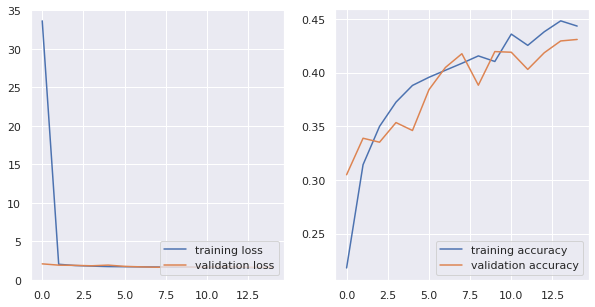

In [ ]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist2 = model2.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist2.epoch, hist2.history['loss'])
axs[0].plot(hist2.epoch, hist2.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist2.epoch, hist2.history['accuracy'])
axs[1].plot(hist2.epoch, hist2.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 5s 21ms/step - loss: 34.8367 - accuracy: 0.2789 - val_loss: 1.7169 - val_accuracy: 0.3744
Epoch 2/15
200/200 [==============================] - 4s 19ms/step - loss: 1.6939 - accuracy: 0.3871 - val_loss: 1.6123 - val_accuracy: 0.4041
Epoch 3/15
200/200 [==============================] - 4s 19ms/step - loss: 1.6013 - accuracy: 0.4249 - val_loss: 1.5600 - val_accuracy: 0.4490
Epoch 4/15
200/200 [==============================] - 4s 20ms/step - loss: 1.5414 - accuracy: 0.4476 - val_loss: 1.5356 - val_accuracy: 0.4463
Epoch 5/15
200/200 [==============================] - 4s 20ms/step - loss: 1.5049 - accuracy: 0.4616 - val_loss: 1.5524 - val_accuracy: 0.4503
Epoch 6/15
200/200 [==============================] - 4s 19ms/step - loss: 1.4599 - accuracy: 0.4739 - val_loss: 1.4833 - val_accuracy: 0.4725
Epoch 7/15
200/200 [==============================] - 4s 19ms/step - loss: 1.4246 - accuracy: 0.4875 - val_loss: 1.5021 - val_accuracy: 0.458

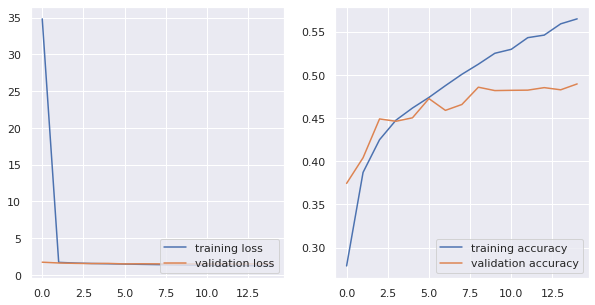

In [ ]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist3 = model3.fit(x=train_images, y=train_labels,
                 epochs=15, batch_size=250, 
                 validation_data=(test_images,test_labels),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist3.epoch, hist3.history['loss'])
axs[0].plot(hist3.epoch, hist3.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist3.epoch, hist3.history['accuracy'])
axs[1].plot(hist3.epoch, hist3.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Epoch 1/15
200/200 [==============================] - 5s 22ms/step - loss: 1.7074 - accuracy: 0.3895 - val_loss: 1.4065 - val_accuracy: 0.4962
Epoch 2/15
200/200 [==============================] - 4s 20ms/step - loss: 1.2900 - accuracy: 0.5341 - val_loss: 1.3940 - val_accuracy: 0.5064
Epoch 3/15
200/200 [==============================] - 4s 20ms/step - loss: 1.2197 - accuracy: 0.5619 - val_loss: 1.3721 - val_accuracy: 0.5096
Epoch 4/15
200/200 [==============================] - 4s 20ms/step - loss: 1.1564 - accuracy: 0.5864 - val_loss: 1.3611 - val_accuracy: 0.5204
Epoch 5/15
200/200 [==============================] - 4s 19ms/step - loss: 1.1121 - accuracy: 0.6022 - val_loss: 1.3717 - val_accuracy: 0.5247
Epoch 6/15
200/200 [==============================] - 4s 20ms/step - loss: 1.0691 - accuracy: 0.6168 - val_loss: 1.3870 - val_accuracy: 0.5127
Epoch 7/15
200/200 [==============================] - 4s 19ms/step - loss: 1.0401 - accuracy: 0.6290 - val_loss: 1.3809 - val_accuracy: 0.5279

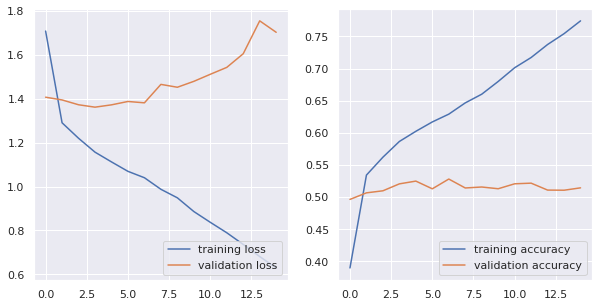

In [ ]:
#With standardised data (x_train)
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist3 = model3.fit(x=X_train, y=y_train,
                 epochs=15, batch_size=250, 
                 validation_data=(X_test,y_test),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist3.epoch, hist3.history['loss'])
axs[0].plot(hist3.epoch, hist3.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist3.epoch, hist3.history['accuracy'])
axs[1].plot(hist3.epoch, hist3.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

true label:  [0] ; predicted:  0 (airplane)


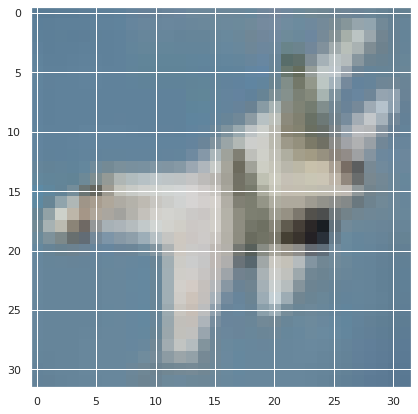

In [ ]:
im_id = 10
y_pred = model(test_images)

y_pred_most_probable = np.argmax(y_pred[im_id])
print('true label: ', test_labels[im_id],
      '; predicted: ',  y_pred_most_probable,
      f'({cifar10_class_names[y_pred_most_probable]})')
plt.imshow(test_images[im_id], cmap='gray');

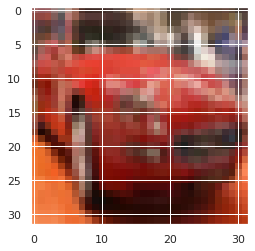

In [ ]:
plt.imshow(X_train[5], cmap='gray');

In [ ]:
#Gray scale transformation for data "augmentation"
import cv2
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 4s 18ms/step - loss: 2.3965 - accuracy: 0.1851 - val_loss: 2.0222 - val_accuracy: 0.2565
Epoch 2/15
200/200 [==============================] - 3s 17ms/step - loss: 1.9157 - accuracy: 0.3091 - val_loss: 1.8557 - val_accuracy: 0.3354
Epoch 3/15
200/200 [==============================] - 3s 17ms/step - loss: 1.8241 - accuracy: 0.3453 - val_loss: 1.7622 - val_accuracy: 0.3693
Epoch 4/15
200/200 [==============================] - 3s 17ms/step - loss: 1.7679 - accuracy: 0.3672 - val_loss: 1.7477 - val_accuracy: 0.3743
Epoch 5/15
200/200 [==============================] - 3s 17ms/step - loss: 1.7255 - accuracy: 0.3846 - val_loss: 1.7162 - val_accuracy: 0.3828
Epoch 6/15
200/200 [==============================] - 3s 17ms/step - loss: 1.6809 - accuracy: 0.3991 - val_loss: 1.6956 - val_accuracy: 0.3971
Epoch 7/15
200/200 [==============================] - 3s 17ms/step - loss: 1.6552 - accuracy: 0.4092 - val_loss: 1.7001 - val_accuracy: 0.3881

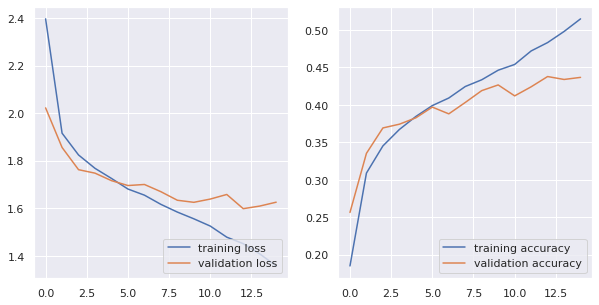

In [ ]:
#With standardised data (x_train-gray) in Gray scale 
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist4 = model4.fit(x=X_train_gray, y=y_train,
                 epochs=15, batch_size=250, 
                 validation_data=(X_test_gray,y_test),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist4.epoch, hist4.history['loss'])
axs[0].plot(hist4.epoch, hist4.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist4.epoch, hist4.history['accuracy'])
axs[1].plot(hist4.epoch, hist4.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

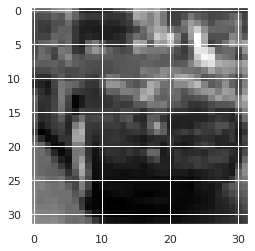

In [ ]:
plt.imshow(X_train_gray[5], cmap='gray');

In [ ]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
#from keras.datasets import cifar10
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.metrics import confusion_matrix
#from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
#from keras.models import Sequential, load_model
#from keras.callbacks import EarlyStopping

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[607  41  75  15  25  16  28  16 136  41]
 [ 46 643  22  24   7  29  10  15  66 138]
 [ 98  13 483  84 101  87  58  32  26  18]
 [ 37  24 118 322  47 261 100  26  25  40]
 [ 61   4 253  75 388  59  87  37  24  12]
 [ 34  11  94 188  68 490  58  25  15  17]
 [ 22  25 143  83  95  73 523   9   7  20]
 [ 59  14  70  68 105 120  19 465  17  63]
 [ 83  63  23  32  23  28   9   8 684  47]
 [ 59 181  14  31  22  36  22  21  77 537]]


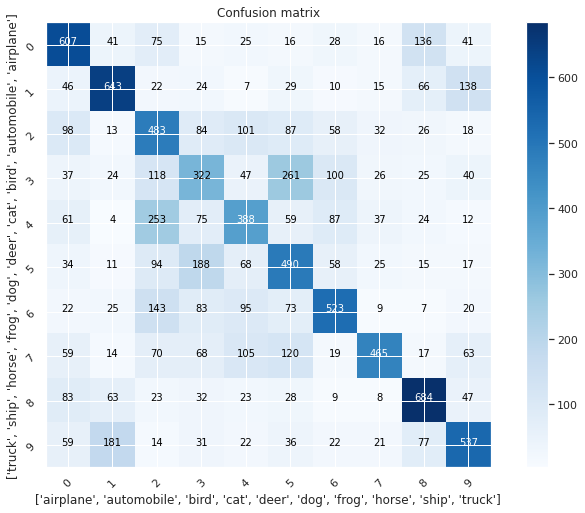

In [ ]:
# Plot confusion matrix for Model 3 
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
  plt.show()


p_test = model3.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[489  29 100  21  76  15  33  43 139  55]
 [ 53 478   4  25  29  12  52  27  90 230]
 [ 77  22 302  97 129  83 139  74  37  40]
 [ 44  30  49 275 107 133 147  88  34  93]
 [ 71  14 159  55 367  31 131  92  44  36]
 [ 40  23  69 177  80 313 102  97  39  60]
 [ 34  35  72  66 109  41 515  34  36  58]
 [ 50  30  46  58  94  49  48 510  35  80]
 [132  79  18  43  44  13  19  30 544  78]
 [ 41 134   4  44  18  20  39  41  84 575]]


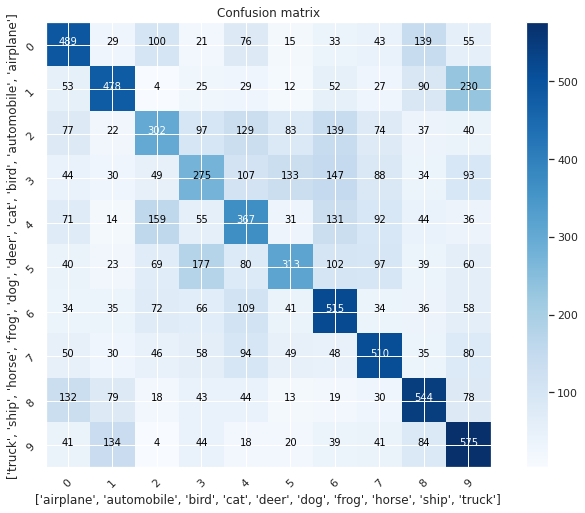

In [ ]:
# Plot confusion matrix for Model 4 (Gray scale) 
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
  plt.show()


p_test = model4.predict(X_test_gray).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
X_train_rotate = X_train
X_test_rotate = X_test

In [ ]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train_rotate)

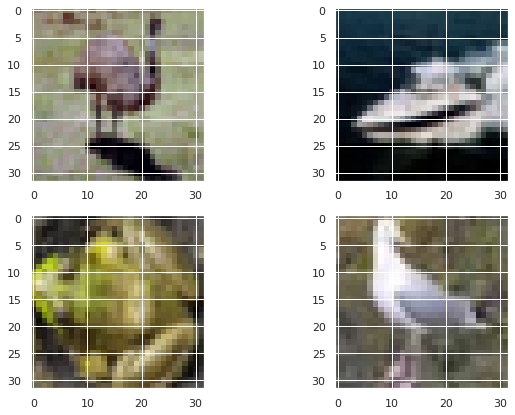

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=50, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

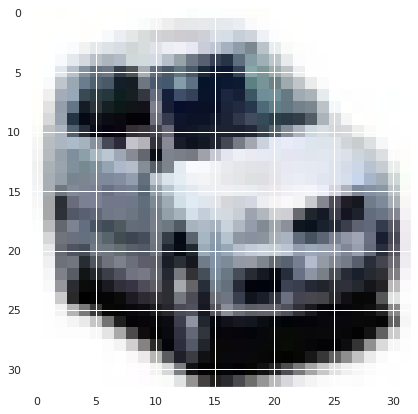

In [ ]:
plt.imshow(X_train_rotate[226], cmap='gray');

In [ ]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='relu'),
  tf.keras.layers.Dense(2000, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/15
200/200 [==============================] - 5s 25ms/step - loss: 2.1054 - accuracy: 0.2547 - val_loss: 1.7989 - val_accuracy: 0.3434
Epoch 2/15
200/200 [==============================] - 4s 20ms/step - loss: 1.7235 - accuracy: 0.3746 - val_loss: 1.6839 - val_accuracy: 0.3901
Epoch 3/15
200/200 [==============================] - 4s 19ms/step - loss: 1.6276 - accuracy: 0.4123 - val_loss: 1.5973 - val_accuracy: 0.4279
Epoch 4/15
200/200 [==============================] - 4s 21ms/step - loss: 1.5612 - accuracy: 0.4401 - val_loss: 1.5627 - val_accuracy: 0.4324
Epoch 5/15
200/200 [==============================] - 4s 21ms/step - loss: 1.5148 - accuracy: 0.4561 - val_loss: 1.5716 - val_accuracy: 0.4409
Epoch 6/15
200/200 [==============================] - 4s 22ms/step - loss: 1.4513 - accuracy: 0.4790 - val_loss: 1.4828 - val_accuracy: 0.4682
Epoch 7/15
200/200 [==============================] - 4s 22ms/step - loss: 1.4185 - accuracy: 0.4912 - val_loss: 1.4648 - val_accuracy: 0.4725

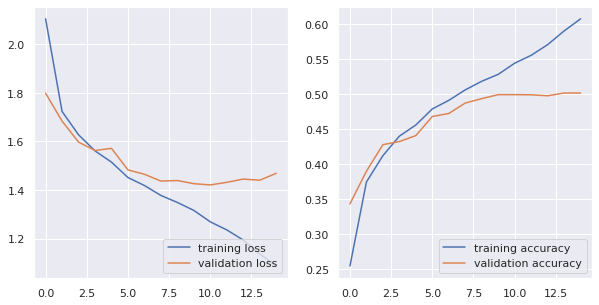

In [ ]:
#With standardised data (x_train-gray) with randomly mirrored of 25%
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist5 = model5.fit(x=X_train_rotate, y=y_train,
                 epochs=15, batch_size=250, 
                 validation_data=(X_test_rotate,y_test),
                 callbacks=[save_callback])

# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist5.epoch, hist5.history['loss'])
axs[0].plot(hist5.epoch, hist5.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist5.epoch, hist5.history['accuracy'])
axs[1].plot(hist5.epoch, hist5.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[607  14  95  37  15   9  30  40  87  66]
 [ 60 445  22  40   8  28  31  39  58 269]
 [ 68  10 462 137  60  48 122  72   7  14]
 [ 25   4 101 405  38 170 155  54   8  40]
 [ 47   4 245  99 295  31 158  97  13  11]
 [ 22   3 108 227  34 376 121  78  15  16]
 [ 10   9 117  76  62  38 657  16   5  10]
 [ 35   5  58  76  60  65  44 613   8  36]
 [147  26  21  63  32  24  19  20 535 113]
 [ 57  73  14  43  16  27  42  72  34 622]]


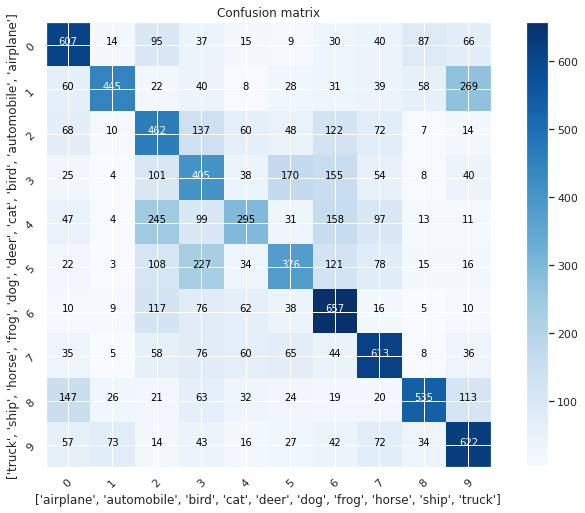

In [ ]:
# Plot confusion matrix for Model 5 (augmented data with horizontal flip )
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes, rotation=45)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(['truck', 'ship' , 'horse' , 'frog' , 'dog' , 'deer' , 'cat' , 'bird' , 'automobile' , 'airplane'])
  plt.xlabel(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
  plt.show()


p_test = model5.predict(X_test_rotate).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#one_hot_encoder = OneHotEncoder(sparse=False)
#one_hot_encoder.fit(y_train)
#y_train = one_hot_encoder.transform(y_train)
#y_test = one_hot_encoder.transform(y_test)
#predictions = model.predict(X_test)
#predictions = one_hot_encoder.inverse_transform(predictions)
#y_test = one_hot_encoder.inverse_transform(y_test)
#cm = confusion_matrix(Y_test, predictions)

In [ ]:
#plt.figure(figsize=(9,9))
#sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt=’d’, annot=True, cmap=plt.cm.Blues)
#plt.xlabel(‘Predicted’)
#plt.ylabel(‘Actual’)
#plt.show()

STL10 dataset is derived from the CIFAR10 dataset but unlabeled data for unsupervised learning. downloaded from: http://cs.stanford.edu/~acoates/stl10/

In [ ]:
#only needed when tere is time to to check against the STL10 dateset that is "prepared for unsupervised"

#n_train = len(train_labels)
#x_train = train_images.reshape(50000,32,32,3)
#y_train = train_labels

#n_test = len(test_labels)
#x_test = test_images.reshape(10000,32,32,3)
#y_test = test_labels

#x_train = x_train.transpose(0,2,3,1)
#x_test = x_test.transpose(0,2,3,1)




